In [1]:
#!unzip '/content/drive/MyDrive/archive (2).zip' && rm '/content/drive/MyDrive/archive (2).zip'

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train'
valid_path = '/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/test'

In [4]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 1s 0us/step


In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train/*')

In [7]:
len(folders)

4

In [8]:
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
# tell the model what loss and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/20
122/122 [==============================] - 641s 5s/step - loss: 2.8532 - accuracy: 0.4249 - val_loss: 2.8228 - val_accuracy: 0.3302
Epoch 2/20
122/122 [==============================] - 365s 3s/step - loss: 1.4300 - accuracy: 0.5377 - val_loss: 1.9462 - val_accuracy: 0.4057
Epoch 3/20
122/122 [==============================] - 368s 3s/step - loss: 1.1509 - accuracy: 0.6048 - val_loss: 1.7929 - val_accuracy: 0.5755
Epoch 4/20
122/122 [==============================] - 365s 3s/step - loss: 0.9481 - accuracy: 0.6433 - val_loss: 1.0005 - val_accuracy: 0.6038
Epoch 5/20
122/122 [==============================] - 364s 3s/step - loss: 1.0510 - accuracy: 0.6269 - val_loss: 2.5428 - val_accuracy: 0.5755
Epoch 6/20
122/122 [==============================] - 364s 3s/step - loss: 1.3409 - accuracy: 0.6166 - val_loss: 1.0421 - val_accuracy: 0.6604
Epoch 7/20
122/122 [==============================] - 361s 3s/step - loss: 1.0744 - accuracy: 0.6622 - val_loss: 1.3409 - val_accuracy: 0.5566

In [ ]:
import matplotlib.pyplot as plt

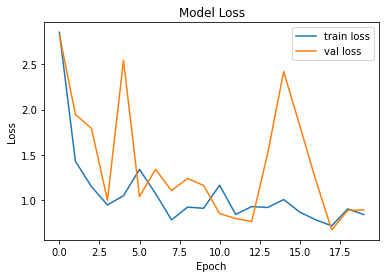

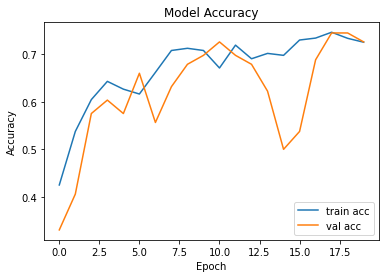

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('LossVal_loss')
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('AccVal_acc')
plt.show()

In [ ]:
# save it as a h5 file

model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Cotton Disease Prediction /Cotton Disease/val/fresh cotton leaf/d (119)_iaip.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)
a

In [32]:
if a==0:
   print("The leaf is diseased cotton leaf")
elif a==1:
   print("The leaf is diseased cotton plant")
elif a==2:
   print("The leaf is fresh cotton leaf")
else:
   print("The leaf is fresh cotton plant")

The leaf is fresh cotton leaf
